In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
customers_df = pd.read_csv('customers.csv')


In [3]:
customers_df

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0
...,...,...,...
71805,8022667294,Dennis Singleton DDS,NaN
71806,4474867021,Paul Mitchell,1.0
71807,9762042472,Kaylee Lang,NaN
71808,8095620266,Christine Oneal,1.0


In [4]:
# Initial Data Inspection
print(customers_df.info())  # To check column types and null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       71810 non-null  int64  
 1   customer_name     71810 non-null  object 
 2   elite_level_code  46043 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB
None


In [5]:
print(customers_df.describe())  # Summary statistics for numeric columns (elite_level_code in this case)

        customer_id  elite_level_code
count  7.181000e+04      46043.000000
mean   5.004334e+09          1.370871
std    2.884255e+09          1.322297
min    1.197800e+04          0.000000
25%    2.514618e+09          0.000000
50%    4.999664e+09          1.000000
75%    7.509126e+09          2.000000
max    9.999935e+09          5.000000


In [6]:
print(customers_df.isnull().sum())  # Check for null values

customer_id             0
customer_name           0
elite_level_code    25767
dtype: int64


In [7]:
# Drop columns with a high number of nulls (if any)
customers_df_cleaned = customers_df.dropna(axis=1, thresh=int(0.6 * len(customers_df)))  # Keeping columns with 60% non-null values


In [8]:
# Drop rows with any null values (if needed)
customers_df_cleaned = customers_df_cleaned.dropna()

In [9]:
# Check cleaned dataset
print(customers_df_cleaned.isnull().sum())

customer_id         0
customer_name       0
elite_level_code    0
dtype: int64


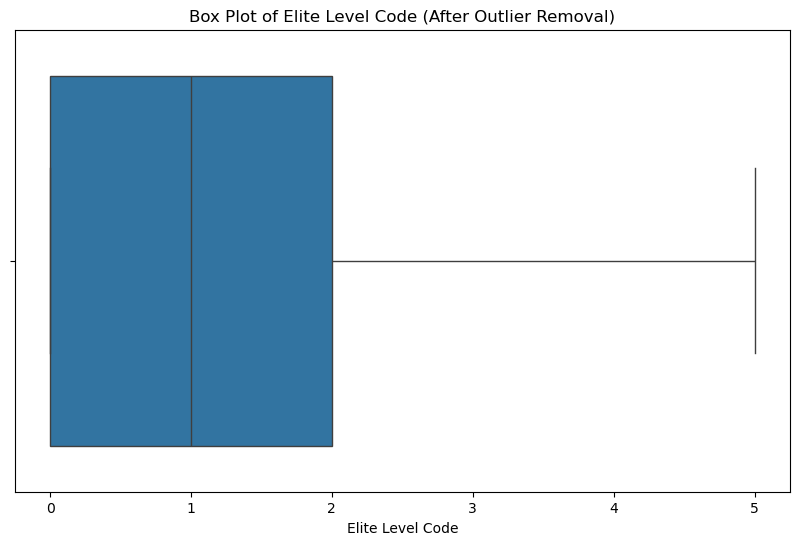

In [11]:
# Check for outliers in elite_level_code
Q1 = customers_df_cleaned['elite_level_code'].quantile(0.25)
Q3 = customers_df_cleaned['elite_level_code'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the dataset
customers_df_no_outliers = customers_df_cleaned[(customers_df_cleaned['elite_level_code'] >= lower_bound) & (customers_df_cleaned['elite_level_code'] <= upper_bound)]

# Visualize with a Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=customers_df_no_outliers['elite_level_code'])
plt.title('Box Plot of Elite Level Code (After Outlier Removal)')
plt.xlabel('Elite Level Code')
plt.show()


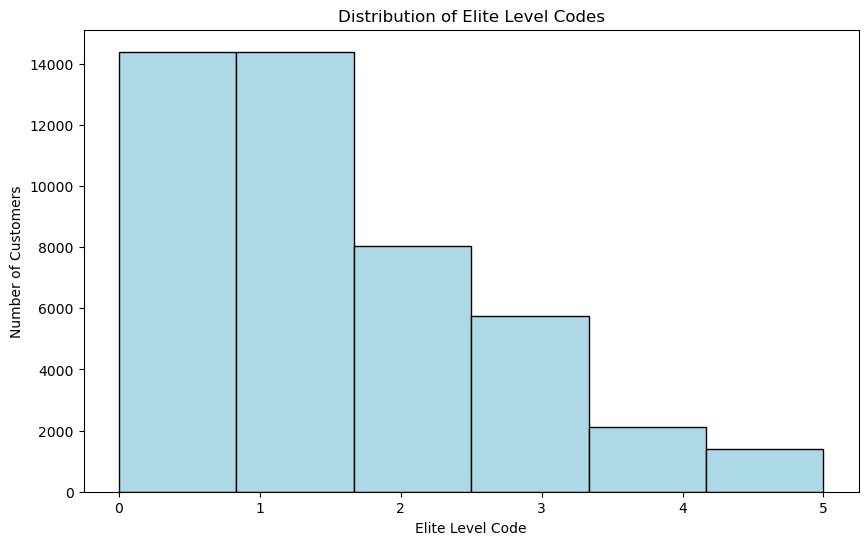

In [12]:
# Visualize the distribution of elite level codes using a histogram
plt.figure(figsize=(10, 6))
plt.hist(customers_df_no_outliers['elite_level_code'], bins=6, color='lightblue', edgecolor='black')
plt.title('Distribution of Elite Level Codes')
plt.xlabel('Elite Level Code')
plt.ylabel('Number of Customers')
plt.show()


/var/folders/nq/999184vs10z8d59n1_268m_c0000gn/T/ipykernel_19606/2458494452.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=elite_level_counts.index, y=elite_level_counts.values, palette='Blues_d')


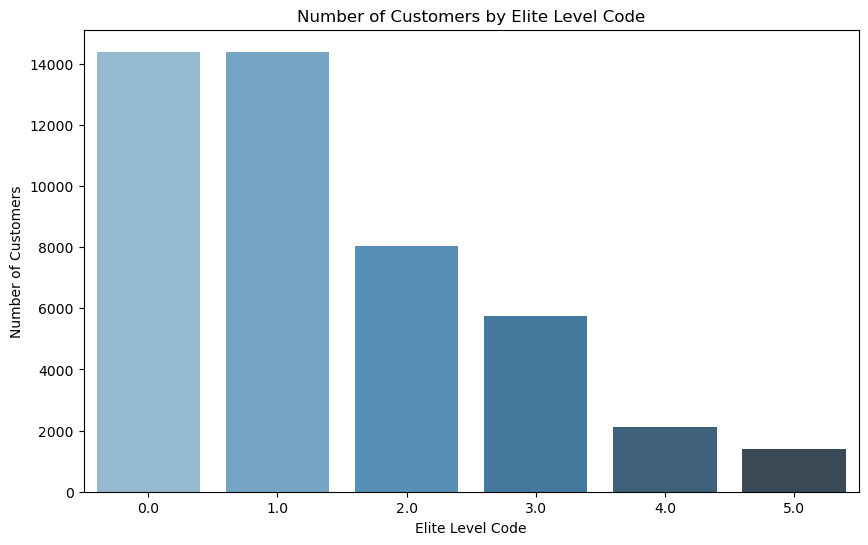

In [13]:
# Bar plot to visualize the number of customers at each elite level
elite_level_counts = customers_df_cleaned['elite_level_code'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=elite_level_counts.index, y=elite_level_counts.values, palette='Blues_d')
plt.title('Number of Customers by Elite Level Code')
plt.xlabel('Elite Level Code')
plt.ylabel('Number of Customers')
plt.show()


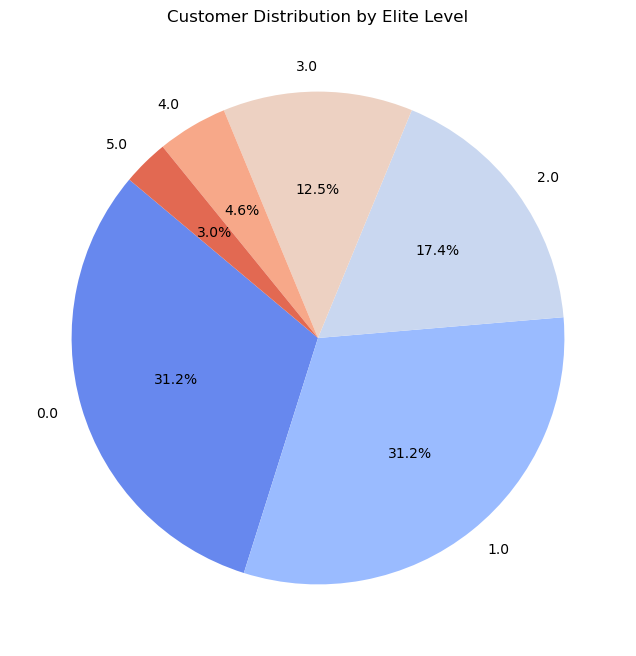

In [14]:
# Pie chart to visualize the distribution of customers by elite level
plt.figure(figsize=(8, 8))
plt.pie(elite_level_counts, labels=elite_level_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("coolwarm", 6))
plt.title('Customer Distribution by Elite Level')
plt.show()
